In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("C:/Users/Yamin Hossain/Downloads/train.csv")
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False




    PassengerId - A unique Id for each passenger. Each Id takes the

form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    Destination - The planet the passenger will be debarking to.
    Age - The age of the passenger.
    VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

    Name - The first and last names of the passenger.
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.



In [4]:
train.duplicated().sum()

0

In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#Exploratory Data Analysis
##Cryosleep & VIP
First of all, we are going to verify the Homeplanet of the people

<AxesSubplot:>

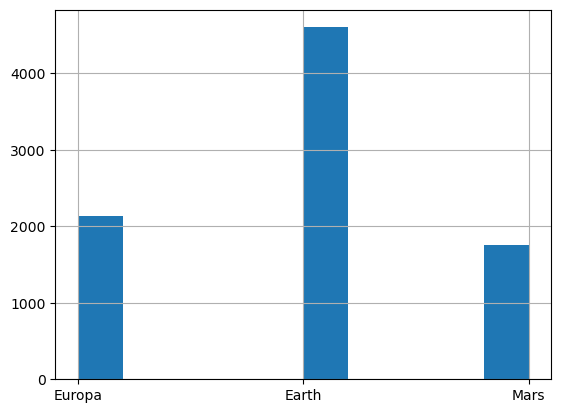

In [7]:
train['HomePlanet'].hist()

In [8]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#train['Transported']=encoder.fit_transform(train['Transported'])
#or
train['Transported']=train['Transported'].apply(lambda x: 1 if x==True else 0)

In [10]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

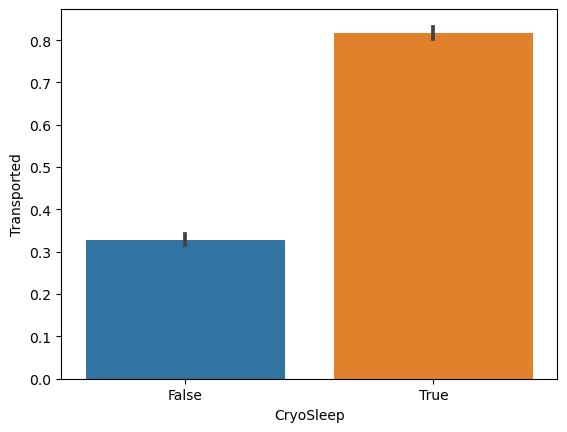

In [11]:
sns.barplot(data=train, x='CryoSleep', y='Transported')

<AxesSubplot:xlabel='VIP', ylabel='Transported'>

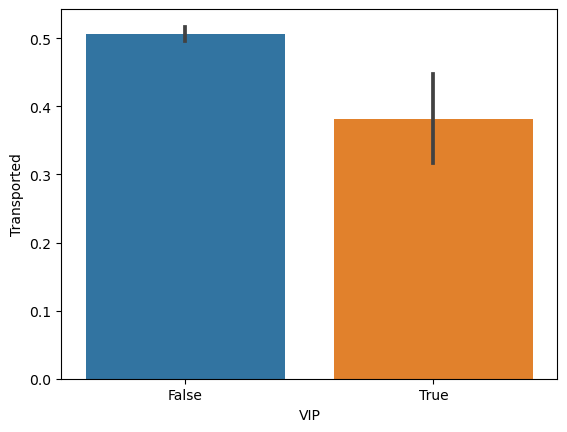

In [12]:
sns.barplot(data=train, x='VIP',y='Transported')

Most the persons in CryoSleep (80%) were transported, so there is a great correlation with this feature. For VIPs was not hte same case, so we are going apply labels for each feature

In [13]:
train['CryoSleep']=train['CryoSleep'].apply(lambda x: 3 if x==True else 0)
train['VIP']=train['VIP'].apply(lambda x: 1 if x== False else 0)
#or
#train['CryoSleep']=encoder.fit_transform(train['CryoSleep'])
#train['VIP']=encoder.fit_transform(train['VIP'])

In [14]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,1,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [15]:
txt = 'A/0/S'
txt.split('/')[1]

'0'

In [16]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,1,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,3,G/1499/S,PSO J318.5-22,18.0,1,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,1,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,1,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [17]:
train['Cabin'] = train['Cabin'].astype(str)
train['CabinDeck'] = train['Cabin'].apply(lambda x: x.split('/')[0])

In [18]:
train['Cabin_ver'] = train['Cabin'].apply(lambda x: len(x))

<AxesSubplot:>

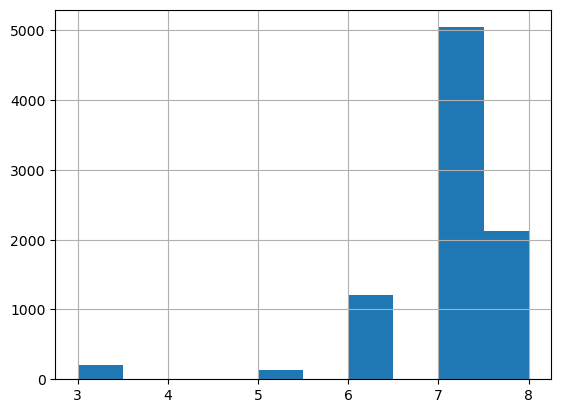

In [19]:
train['Cabin_ver'].hist()

In [20]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,Cabin_ver
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,1,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,5
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,5
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,5
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,5
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,6
8689,9278_01,Earth,3,G/1499/S,PSO J318.5-22,18.0,1,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,8
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,1,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,8
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,1,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,7


In [21]:
cabin_nan = train[train['Cabin_ver']==3]

<AxesSubplot:xlabel='Cabin_ver', ylabel='Transported'>

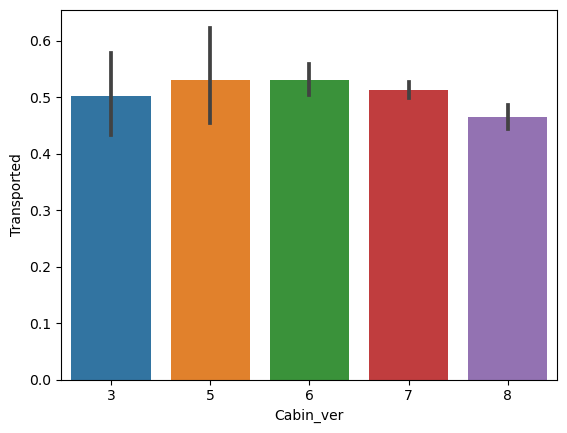

In [22]:
sns.barplot(data=train,  x='Cabin_ver', y='Transported')

The cabin numbers were balanced, so they may not be an indicator

Hypothesis:

    Would spent money have an correlation with the Home Planet_

<AxesSubplot:>

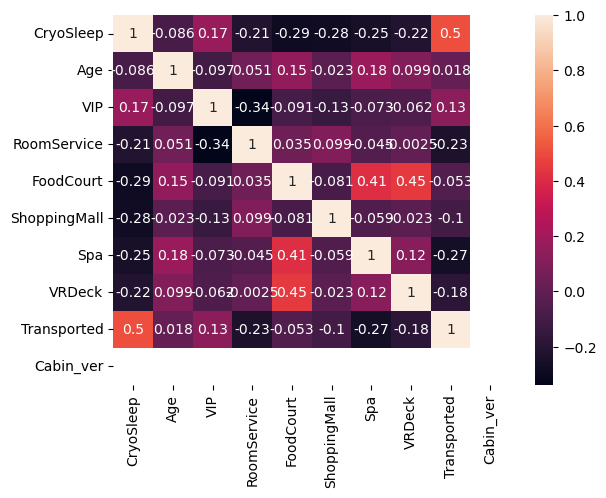

In [23]:
sns.heatmap(cabin_nan.corr(), annot=True)

In [24]:
cabin_nan

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,Cabin_ver
15,0012_01,Earth,0,nan,TRAPPIST-1e,31.0,1,32.0,0.0,876.0,0.0,0.0,Justie Pooles,0,nan,3
93,0101_01,Mars,3,nan,TRAPPIST-1e,31.0,1,0.0,0.0,0.0,0.0,0.0,Book Trad,1,nan,3
103,0110_01,Europa,0,nan,TRAPPIST-1e,32.0,1,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,0,nan,3
222,0239_01,Mars,0,nan,TRAPPIST-1e,37.0,1,637.0,0.0,0.0,92.0,319.0,Diedow Resty,0,nan,3
227,0244_01,Mars,3,nan,TRAPPIST-1e,43.0,1,0.0,0.0,0.0,0.0,0.0,Froos Sad,1,nan,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,0,nan,55 Cancri e,53.0,1,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,0,nan,3
8475,9057_01,Europa,0,nan,55 Cancri e,36.0,0,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,0,nan,3
8485,9069_03,Europa,3,nan,55 Cancri e,25.0,1,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,1,nan,3
8509,9081_03,Earth,3,nan,TRAPPIST-1e,1.0,1,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,0,nan,3


In [25]:
cabin_nan['VIP'].sum()

187

We should verify if there is a correlation between the cabin side or number and the spendings on the Titanic Spaceship

In [26]:
train['Cabin'] = train['Cabin'].astype(str)
train['CabinDeck'] = train['Cabin'].apply(lambda x: x if x=='nan' else x.split('/')[0])
train['CabinNum'] = train['Cabin'].apply(lambda x: x if x=='nan' else x.split('/')[1])
train['CabinSide'] = train['Cabin'].apply(lambda x: x if x=='nan' else x.split('/')[2])

In [27]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,Cabin_ver,CabinNum,CabinSide
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,1,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,5,0,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,5,0,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,5,0,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,5,0,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,5,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,6,98,P
8689,9278_01,Earth,3,G/1499/S,PSO J318.5-22,18.0,1,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,8,1499,S
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,1,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,8,1500,S
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,1,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,7,608,S


In [28]:
train['FoodCourt'].fillna(0,inplace=True)
train['RoomService'].fillna(0,inplace=True)
train['ShoppingMall'].fillna(0,inplace=True)
train['Spa'].fillna(0,inplace=True)
train['VRDeck'].fillna(0,inplace=True)
train['Total_spent'] = train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']

In [29]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,Cabin_ver,CabinNum,CabinSide,Total_spent
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,1,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,5,0,P,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,5,0,S,736.0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,5,0,S,10383.0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,5,0,S,5176.0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,5,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,6,98,P,8536.0
8689,9278_01,Earth,3,G/1499/S,PSO J318.5-22,18.0,1,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,8,1499,S,0.0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,1,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,8,1500,S,1873.0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,1,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,7,608,S,4637.0


<AxesSubplot:xlabel='CabinSide', ylabel='Total_spent'>

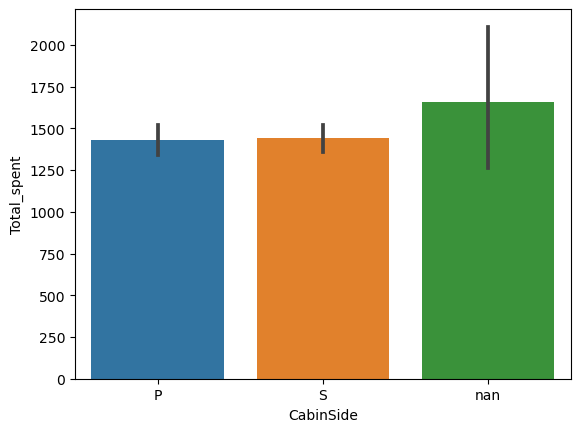

In [30]:
sns.barplot(data=train, x='CabinSide', y='Total_spent')

(0.0, 5000.0)

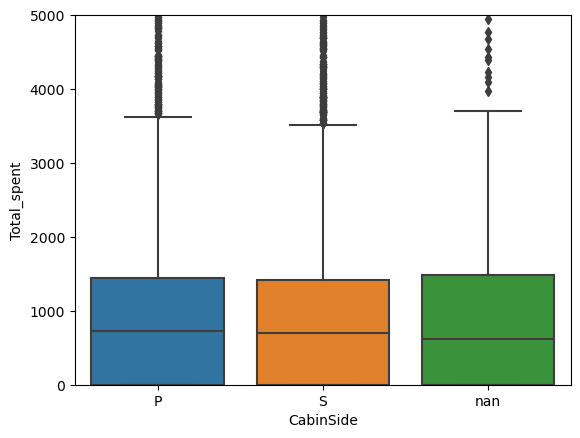

In [31]:
sns.boxplot(data=train, x='CabinSide', y='Total_spent')
plt.ylim(0,5000)

In [32]:
train['CabinSide'] = train['CabinSide'].apply(lambda x: 'other' if x=='nan' else x)

The Cabin Side didn't had difference between the spent money. Maybe, we can verify what about the home planet, total spent and transported

<AxesSubplot:xlabel='HomePlanet', ylabel='Total_spent'>

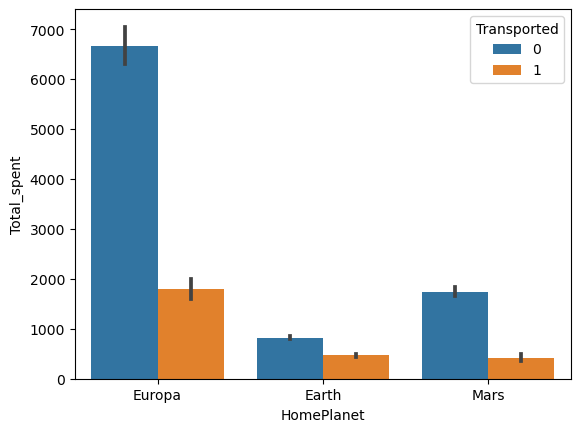

In [33]:
sns.barplot(data=train, x='HomePlanet',y='Total_spent',hue='Transported')

In [34]:
train['Name'].fillna('other other', inplace=True)
train['name'] = train['Name'].apply(lambda x: x.split(' ')[0])
train['last_name'] = train['Name'].apply(lambda x: x.split(' ')[1])

<AxesSubplot:xlabel='Transported', ylabel='Total_spent'>

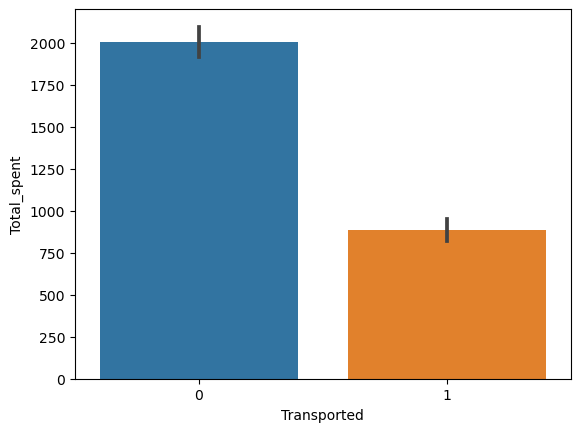

In [35]:
sns.barplot(data=train, x='Transported',y='Total_spent')

<AxesSubplot:>

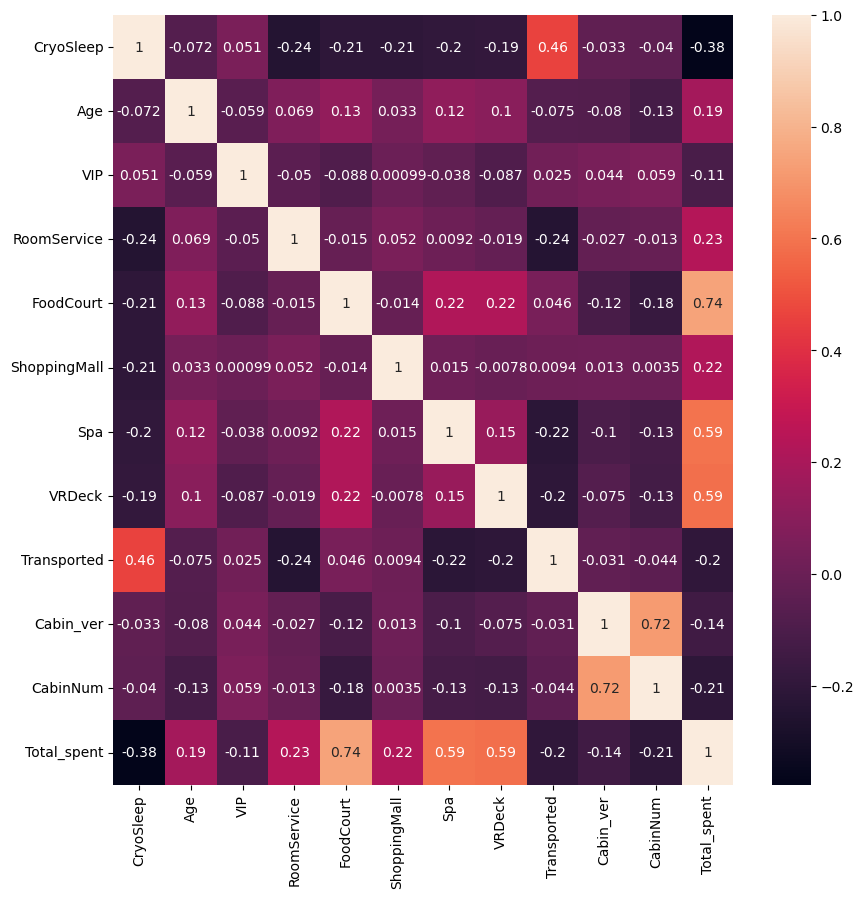

In [36]:
train['CabinNum'] = train['CabinNum'].apply(lambda x: 0 if x=='nan' else x)
train['CabinNum'] = train['CabinNum'].astype(int)

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

In [37]:
cabin_dict = {'other':0, 'P':1 , 'S':2}
train['CabinSide'] = train['CabinSide'].apply(lambda x: cabin_dict.get(x))

<AxesSubplot:xlabel='CabinDeck', ylabel='Count'>

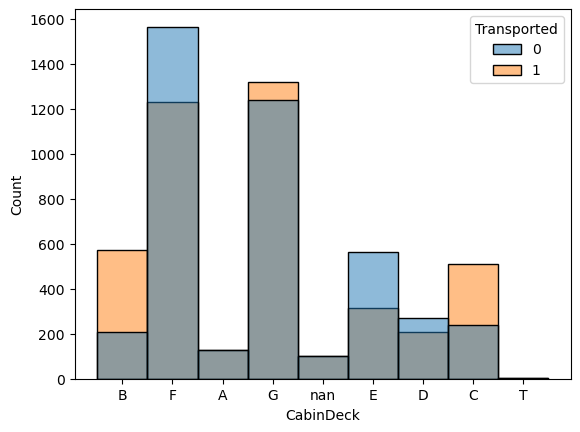

In [38]:
sns.histplot(data=train, x='CabinDeck', hue='Transported')

In [39]:
deck_dict = {'T':0 , 'nan':1, 'A':2, 'D':3, 'E':4, 'C':5, 'B':6, 'F':7, 'G':8}
train['CabinDeck'] = train['CabinDeck'].apply(lambda x: deck_dict.get(x))

In [40]:
train.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,CabinDeck,Cabin_ver,CabinNum,CabinSide,Total_spent,name,last_name
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,1,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0,6,5,0,1,0.0,Maham,Ofracculy
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,1,109.0,9.0,25.0,...,44.0,Juanna Vines,1,7,5,0,2,736.0,Juanna,Vines
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,0,43.0,3576.0,0.0,...,49.0,Altark Susent,0,2,5,0,2,10383.0,Altark,Susent
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,1,0.0,1283.0,371.0,...,193.0,Solam Susent,0,2,5,0,2,5176.0,Solam,Susent
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,1,303.0,70.0,151.0,...,2.0,Willy Santantines,1,7,5,1,2,1091.0,Willy,Santantines


<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

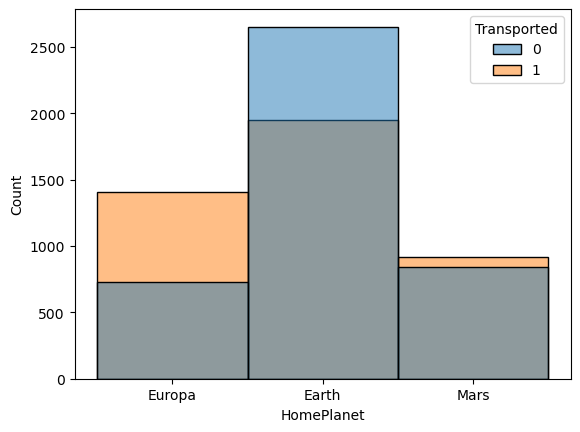

In [41]:
sns.histplot(data=train, x='HomePlanet', hue='Transported')

# Home and Planet and Destination

In [42]:
train['Homeplanet'] = train['HomePlanet'].astype(str)
planets = train['HomePlanet'].unique()
planet_dict = {planets[0]:3, planets[2]:2, planets[1]:1, 'nan':0}

<AxesSubplot:xlabel='Destination', ylabel='Total_spent'>

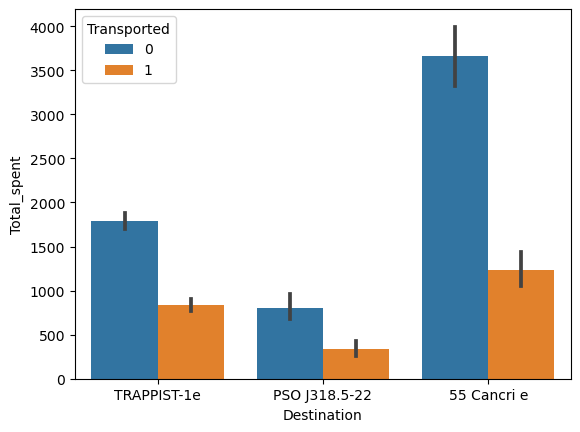

In [43]:
sns.barplot(data=train, x='Destination', y='Total_spent', hue='Transported')

In [44]:
planet_dict

{'Europa': 3, 'Mars': 2, 'Earth': 1, 'nan': 0}

In [45]:
train[train['HomePlanet']== 'nan']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,CabinDeck,Cabin_ver,CabinNum,CabinSide,Total_spent,name,last_name,Homeplanet


In [46]:
train['HomePlanet'] = train['HomePlanet'].apply(lambda x: planet_dict.get(x))

In [47]:
train['Destination'] = train['Destination'].astype(str)
train[train['Destination']=='nan']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,CabinDeck,Cabin_ver,CabinNum,CabinSide,Total_spent,name,last_name,Homeplanet
47,0045_02,2.0,3,F/10/P,nan,19.0,1,0.0,0.0,0.0,...,Mass Chmad,1,7,6,10,1,0.0,Mass,Chmad,Mars
128,0138_02,1.0,0,E/5/P,nan,34.0,1,0.0,22.0,0.0,...,Monah Gambs,0,4,5,5,1,793.0,Monah,Gambs,Earth
139,0152_01,1.0,0,F/32/P,nan,41.0,1,0.0,0.0,0.0,...,Andan Estron,0,7,6,32,1,607.0,Andan,Estron,Earth
347,0382_01,NaN,0,G/64/P,nan,23.0,1,348.0,0.0,0.0,...,Blanie Floydendley,0,8,6,64,1,720.0,Blanie,Floydendley,nan
430,0462_01,1.0,3,G/67/S,nan,50.0,1,0.0,0.0,0.0,...,Ronia Sosanturney,0,8,6,67,2,0.0,Ronia,Sosanturney,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956_02,1.0,3,G/1453/P,nan,20.0,1,0.0,0.0,0.0,...,Erina Bonnondry,1,8,8,1453,1,0.0,Erina,Bonnondry,Earth
8551,9130_01,2.0,3,F/1765/S,nan,41.0,1,0.0,0.0,0.0,...,Blers Corte,1,7,8,1765,2,0.0,Blers,Corte,Mars
8616,9195_02,2.0,3,F/1779/S,nan,33.0,1,0.0,0.0,0.0,...,Ceros Purle,1,7,8,1779,2,0.0,Ceros,Purle,Mars
8621,9197_02,3.0,0,C/308/P,nan,41.0,0,0.0,7964.0,0.0,...,Aludram Platch,0,5,7,308,1,17041.0,Aludram,Platch,Europa


<AxesSubplot:xlabel='Destination', ylabel='Count'>

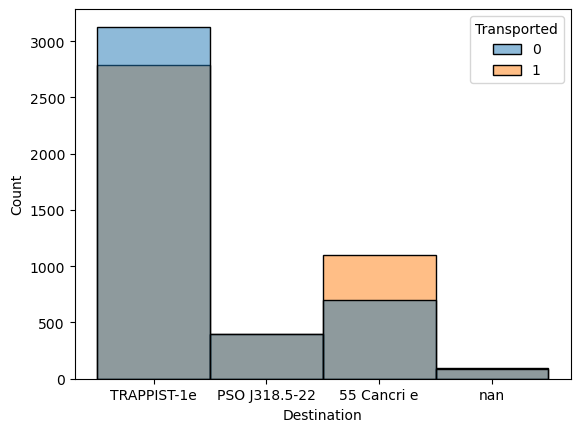

In [48]:
sns.histplot(data=train, x='Destination', hue='Transported')

We will make a dictionary for destination labeling, based on % of successfully transported

In [49]:
train['Destination'] = train['Destination'].astype(str)
destination = train['Destination'].unique()
dest_dict = {destination[3]:0, destination[1]:1, destination[0]:2, destination[2]:3}
train['Destination'] = train['Destination'].apply(lambda x: dest_dict.get(x))

Let's verify if there is a correlation between the age and the transportation. We can create 4 categories

In [50]:
train['youth'] = train['Age'].apply(lambda x: 1 if x<=21 else 0)
train['old'] = train['Age'].apply(lambda x: 1 if x>=60 else 0)
train['middle_age'] = train['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
train['child'] = train['Age'].apply(lambda x:1 if x<12 else 0)

In [51]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinNum,CabinSide,Total_spent,name,last_name,Homeplanet,youth,old,middle_age,child
0,0001_01,3.0,0,B/0/P,2,39.0,1,0.0,0.0,0.0,...,0,1,0.0,Maham,Ofracculy,Europa,0,0,1,0
1,0002_01,1.0,0,F/0/S,2,24.0,1,109.0,9.0,25.0,...,0,2,736.0,Juanna,Vines,Earth,0,0,1,0
2,0003_01,3.0,0,A/0/S,2,58.0,0,43.0,3576.0,0.0,...,0,2,10383.0,Altark,Susent,Europa,0,0,1,0
3,0003_02,3.0,0,A/0/S,2,33.0,1,0.0,1283.0,371.0,...,0,2,5176.0,Solam,Susent,Europa,0,0,1,0
4,0004_01,1.0,0,F/1/S,2,16.0,1,303.0,70.0,151.0,...,1,2,1091.0,Willy,Santantines,Earth,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,3.0,0,A/98/P,3,41.0,0,0.0,6819.0,0.0,...,98,1,8536.0,Gravior,Noxnuther,Europa,0,0,1,0
8689,9278_01,1.0,3,G/1499/S,1,18.0,1,0.0,0.0,0.0,...,1499,2,0.0,Kurta,Mondalley,Earth,1,0,0,0
8690,9279_01,1.0,0,G/1500/S,2,26.0,1,0.0,0.0,1872.0,...,1500,2,1873.0,Fayey,Connon,Earth,0,0,1,0
8691,9280_01,3.0,0,E/608/S,3,32.0,1,0.0,1049.0,0.0,...,608,2,4637.0,Celeon,Hontichre,Europa,0,0,1,0


We will verify if age gaps works

In [52]:
train_age = train[['Transported','youth','middle_age','old','child']]
train_age.corr()

,Transported,youth,middle_age,old,child
Transported,1.000000,0.069314,-0.079080,-0.012186,0.121599
youth,0.069314,1.000000,-0.804732,-0.117889,0.457138
middle_age,-0.079080,-0.804732,1.000000,-0.247246,-0.442698
old,-0.012186,-0.117889,-0.247246,1.000000,-0.053891
child,0.121599,0.457138,-0.442698,-0.053891,1.000000


In [53]:
train_age

,Transported,youth,middle_age,old,child
0,0,0,1,0,0
1,1,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,1,0,0,0
...,...,...,...,...,...
8688,0,0,1,0,0
8689,0,1,0,0,0
8690,1,0,1,0,0
8691,0,0,1,0,0


In [54]:
train_age = pd.melt(train_age, id_vars=['Transported'], value_vars=['youth','middle_age','old'])

In [55]:
train_age

,Transported,variable,value
0,0,youth,0
1,1,youth,0
2,0,youth,0
3,0,youth,0
4,1,youth,1
...,...,...,...
26074,0,old,0
26075,0,old,0
26076,1,old,0
26077,0,old,0


<AxesSubplot:xlabel='variable', ylabel='Count'>

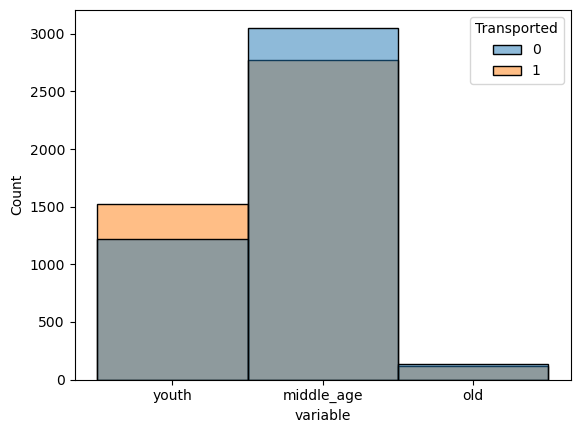

In [56]:
train_age = train_age[train_age['value']==1]
sns.histplot(data=train_age, x='variable',hue='Transported')

We can observer that youth people and middle_age had more successfull transported than the others

We are going to verify the groups of passengers (family)

In [57]:
train['fam'] = train['PassengerId'].apply(lambda x: x.split('_')[0])
train['pass_num'] = train['PassengerId'].apply(lambda x: x.split('_')[1])
train['pass_num'] = train['pass_num'].astype(int)

In [58]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Total_spent,name,last_name,Homeplanet,youth,old,middle_age,child,fam,pass_num
0,0001_01,3.0,0,B/0/P,2,39.0,1,0.0,0.0,0.0,...,0.0,Maham,Ofracculy,Europa,0,0,1,0,0001,1
1,0002_01,1.0,0,F/0/S,2,24.0,1,109.0,9.0,25.0,...,736.0,Juanna,Vines,Earth,0,0,1,0,0002,1
2,0003_01,3.0,0,A/0/S,2,58.0,0,43.0,3576.0,0.0,...,10383.0,Altark,Susent,Europa,0,0,1,0,0003,1
3,0003_02,3.0,0,A/0/S,2,33.0,1,0.0,1283.0,371.0,...,5176.0,Solam,Susent,Europa,0,0,1,0,0003,2
4,0004_01,1.0,0,F/1/S,2,16.0,1,303.0,70.0,151.0,...,1091.0,Willy,Santantines,Earth,1,0,0,0,0004,1


<AxesSubplot:xlabel='pass_num', ylabel='Count'>

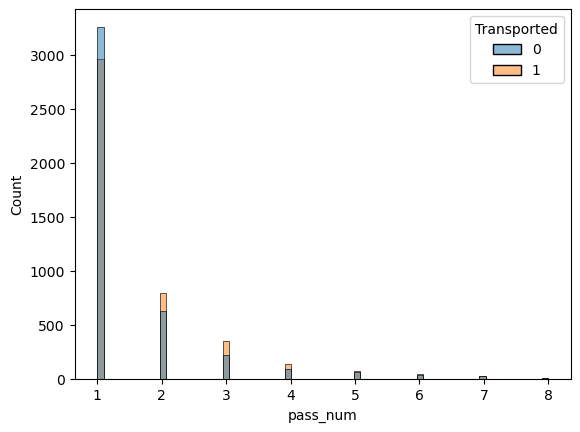

In [59]:
sns.histplot(data=train, x='pass_num', hue='Transported')

In [60]:
plt.figure(figsize=(30,30))
train['fam'] = train['fam'].astype(int)
#sns.pointplot(data=train, x='fam', y='pass_num', hue='Transported')
#sns.pairplot(data=train hue='Transported')

<Figure size 3000x3000 with 0 Axes>

In [61]:
train['one'] = 1
fm_spent = train.groupby(['last_name','Transported'])[['one','Total_spent']].agg({np.sum, np.mean})

In [62]:
fm_spent.head()

one     Total_spent        
                      mean sum        mean     sum
last_name Transported                             
Acobson   0            1.0   3       880.0  2640.0
          1            1.0   1       796.0   796.0
Acobsond  0            1.0   2       900.0  1800.0
          1            1.0   1       882.0   882.0
Adavisons 0            1.0   5       832.4  4162.0

In [63]:
fm_spent.drop('other', axis=0, inplace=True)

<AxesSubplot:xlabel='sum', ylabel='mean'>

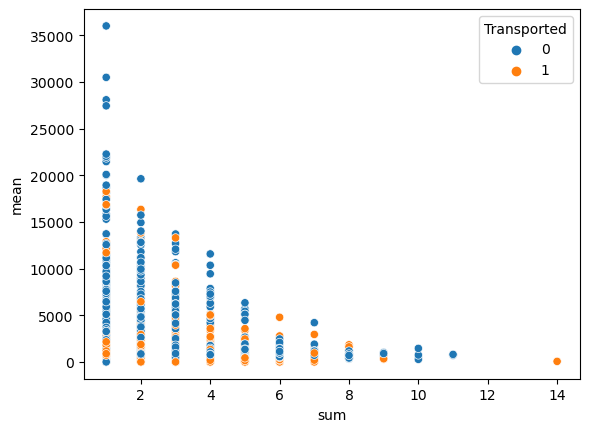

In [64]:
sns.scatterplot(data=fm_spent, x=fm_spent['one']['sum'], y= fm_spent['Total_spent']['mean'], hue='Transported')

In [65]:
train[train['last_name']=='Domington']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,name,last_name,Homeplanet,youth,old,middle_age,child,fam,pass_num,one
3058,3301_01,1.0,3,G/525/S,3,8.0,1,0.0,0.0,0.0,...,Tyle,Domington,Earth,1,0,0,1,3301,1,1
3059,3301_02,1.0,0,G/525/S,2,1.0,1,0.0,0.0,0.0,...,Tonald,Domington,Earth,1,0,0,1,3301,2,1
3060,3301_03,1.0,0,G/525/S,3,0.0,1,0.0,0.0,0.0,...,Yolace,Domington,Earth,1,0,0,1,3301,3,1
3061,3301_04,1.0,0,G/525/S,2,20.0,1,0.0,0.0,0.0,...,Lulah,Domington,Earth,1,0,0,0,3301,4,1
4556,4847_01,1.0,0,F/917/S,2,19.0,1,0.0,0.0,699.0,...,Blancy,Domington,Earth,1,0,0,0,4847,1,1
5441,5812_01,1.0,3,G/943/S,2,0.0,1,0.0,0.0,0.0,...,Holey,Domington,Earth,1,0,0,1,5812,1,1
5442,5812_02,1.0,0,G/943/S,2,3.0,1,0.0,0.0,0.0,...,Garry,Domington,Earth,1,0,0,1,5812,2,1
5443,5812_03,1.0,3,G/943/S,2,12.0,1,0.0,0.0,0.0,...,Evaned,Domington,Earth,1,0,0,0,5812,3,1
5444,5812_04,1.0,3,G/943/S,2,2.0,1,0.0,0.0,0.0,...,Ireen,Domington,Earth,1,0,0,1,5812,4,1
5445,5812_05,1.0,3,G/943/S,2,41.0,1,0.0,0.0,0.0,...,Dian,Domington,Earth,0,0,1,0,5812,5,1


In [66]:
highnumcabin = train[train['CabinNum']>500]

In [67]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,name,last_name,Homeplanet,youth,old,middle_age,child,fam,pass_num,one
0,0001_01,3.0,0,B/0/P,2,39.0,1,0.0,0.0,0.0,...,Maham,Ofracculy,Europa,0,0,1,0,1,1,1
1,0002_01,1.0,0,F/0/S,2,24.0,1,109.0,9.0,25.0,...,Juanna,Vines,Earth,0,0,1,0,2,1,1
2,0003_01,3.0,0,A/0/S,2,58.0,0,43.0,3576.0,0.0,...,Altark,Susent,Europa,0,0,1,0,3,1,1
3,0003_02,3.0,0,A/0/S,2,33.0,1,0.0,1283.0,371.0,...,Solam,Susent,Europa,0,0,1,0,3,2,1
4,0004_01,1.0,0,F/1/S,2,16.0,1,303.0,70.0,151.0,...,Willy,Santantines,Earth,1,0,0,0,4,1,1


(0.0, 5000.0)

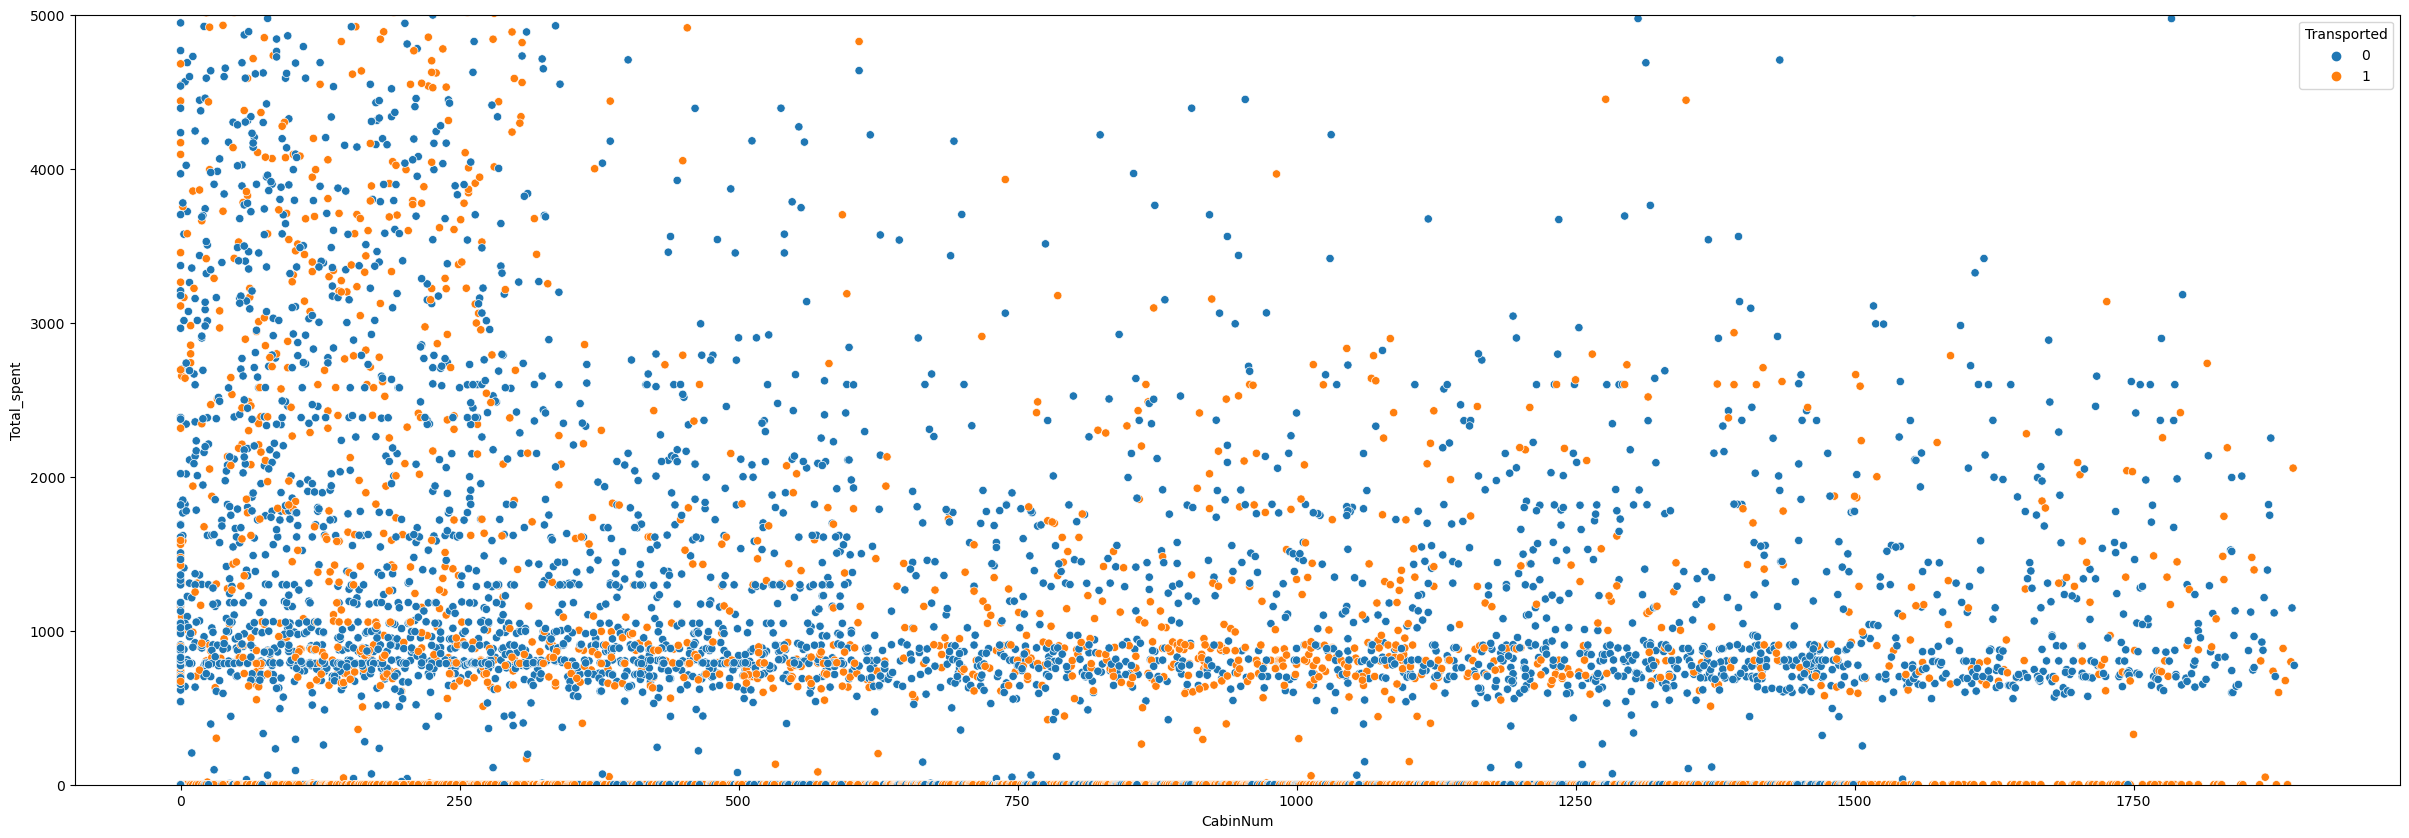

In [68]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=train, x='CabinNum', y='Total_spent', hue='Transported')
plt.ylim(0,5000)

It seems that people who did not spent money had a better possibilities for transportation, between 0-350 in cabin num had more consumptions and it maybe had a better possibility. Between 900 to 1100 also had a better distribution

In [69]:
train['spent0'] = train['Total_spent'].apply(lambda x: 1 if x == 0 else 0)

In [70]:
train['CabinNum2'] = train['CabinNum'].apply(lambda x: 1 if x<550 else (2 if x in range(900,1100) else 0))

In [71]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Homeplanet,youth,old,middle_age,child,fam,pass_num,one,spent0,CabinNum2
0,0001_01,3.0,0,B/0/P,2,39.0,1,0.0,0.0,0.0,...,Europa,0,0,1,0,1,1,1,1,1
1,0002_01,1.0,0,F/0/S,2,24.0,1,109.0,9.0,25.0,...,Earth,0,0,1,0,2,1,1,0,1
2,0003_01,3.0,0,A/0/S,2,58.0,0,43.0,3576.0,0.0,...,Europa,0,0,1,0,3,1,1,0,1
3,0003_02,3.0,0,A/0/S,2,33.0,1,0.0,1283.0,371.0,...,Europa,0,0,1,0,3,2,1,0,1
4,0004_01,1.0,0,F/1/S,2,16.0,1,303.0,70.0,151.0,...,Earth,1,0,0,0,4,1,1,0,1


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   float64
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   int64  
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   int64  
 14  CabinDeck     8693 non-null   int64  
 15  Cabin_ver     8693 non-null   int64  
 16  CabinNum      8693 non-null   int32  
 17  CabinSide     8693 non-null   int64  
 18  Total_spent   8693 non-null 

In [73]:
#fm_spent=df.groupby(['fm'])[['Total_spent']].mean()
#fm_spent

In [74]:
#train = train.join(fm_spent['Total_spent'],rsuffix='_mean')
#train['Total_spent_mean'].fillna(0, inplace=True)

In [75]:
train.drop(columns=['PassengerId','Cabin','Name','last_name','name','one','Cabin_ver'], inplace=True)
train.drop(columns=['Homeplanet'], inplace=True)

In [76]:
from sklearn.preprocessing import MinMaxScaler
#cols_for_scale = ['RooomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_spent','fam','Age',CabinNum,'Total_spent']
cols_for_scale = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_spent','fam','Age','CabinNum']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(train[cols_for_scale])

In [77]:
train[cols_for_scale] = scaled

In [78]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'CabinDeck', 'CabinNum', 'CabinSide', 'Total_spent', 'youth', 'old',
       'middle_age', 'child', 'fam', 'pass_num', 'spent0', 'CabinNum2'],
      dtype='object')

In [79]:
train['Transported'] = train['Transported'].apply(lambda x: 1 if x==True else 0)

# SPLITTING DATA

In [80]:
from sklearn.model_selection import train_test_split
train_data, val_data, train_labels, val_labels = train_test_split(train.drop(columns=['Transported']), train['Transported'],test_size=.2, random_state =13, shuffle=True)

In [81]:
val_data.fillna(0,inplace=True)

# LIGHTGBM

In [82]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgbm

lgb_params = {
    'metric': ['mse','mae'],
    'num_leaves': range(7,200),
    'max_bin': range(50,220),
    'bagging_freq': range(3,50),
    'n_estimators': range(80,200),
    'reg_lambda': np.linspace(0,1, num=25),
    'learning_rate': np.linspace(0.001,0.2, num=25),
    'feature_fraction': np.linspace(0.001,0.8,num=25),
    'max_depth': range(20,400),
    'boosting_type': ['gbdt','dart','goss'],
}

In [84]:
#lgbr = lgbm.LGBMClassifier()
#model = RandomizedSearchCV(lgbr, lgb_params, cv=10, n_iter=20, scoring='accuracy')
#model.fit(train_data, train_labels, eval_set=[(val_data, val_labels)], verbose=0)
#model.best_params_

In [85]:
lgb_params

{'metric': ['mse', 'mae'],
 'num_leaves': range(7, 200),
 'max_bin': range(50, 220),
 'bagging_freq': range(3, 50),
 'n_estimators': range(80, 200),
 'reg_lambda': array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
        0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
        0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
        0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
        0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ]),
 'learning_rate': array([0.001     , 0.00929167, 0.01758333, 0.025875  , 0.03416667,
        0.04245833, 0.05075   , 0.05904167, 0.06733333, 0.075625  ,
        0.08391667, 0.09220833, 0.1005    , 0.10879167, 0.11708333,
        0.125375  , 0.13366667, 0.14195833, 0.15025   , 0.15854167,
        0.16683333, 0.175125  , 0.18341667, 0.19170833, 0.2       ]),
 'feature_fraction': array([0.001     , 0.03429167, 0.06758333, 0.100875  , 0.13416667,
        0.16745833, 0.20075   , 0.23404167, 0.26

In [86]:
new_params={'bagging_freq': 10,
 'boosting_type': 'dart',
 'feature_fraction': 0.8,
 'learning_rate': 0.08762500000000001,
 'max_bin': 61,
 'max_depth': 42,
 'metric': 'mae',
 'n_estimators': 191,
 'num_leaves': 65,
 'reg_lambda': 0.15789473684210525}   

In [87]:
#model.best_score_

In [88]:
model2 = lgbm.LGBMClassifier()
#model2.set_params(**model.best_params_)
model2.set_params(**new_params)
model2.fit(train_data, train_labels, eval_set=[(val_data, val_labels),(train_data, train_labels)], verbose=0)

C:\Users\Yamin Hossain\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


LGBMClassifier(bagging_freq=10, boosting_type='dart', feature_fraction=0.8,
               learning_rate=0.08762500000000001, max_bin=61, max_depth=42,
               metric='mae', n_estimators=191, num_leaves=65,
               reg_lambda=0.15789473684210525)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l1'>

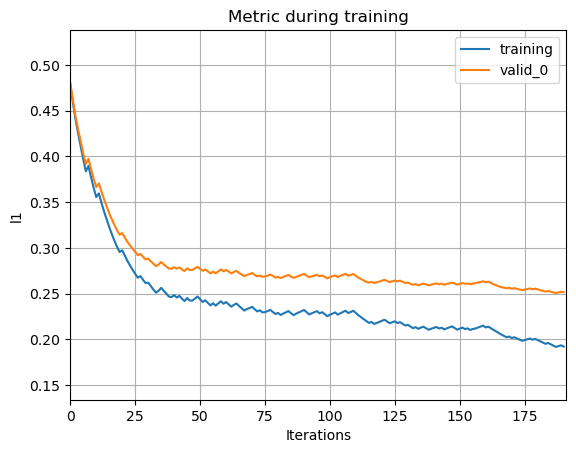

In [89]:
lgbm.plot_metric(model2)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 2000x3000 with 0 Axes>

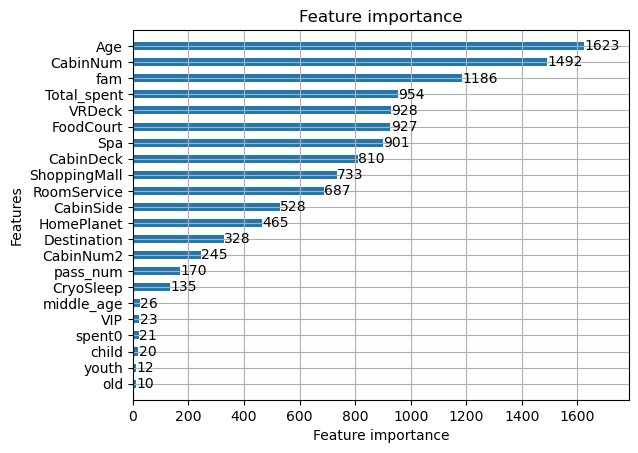

In [90]:
plt.figure(figsize=(20,30))
lgbm.plot_importance(model2, height=0.5)

In [91]:
predicted = model2.predict(val_data)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_labels, predicted)

array([[708, 172],
       [164, 695]], dtype=int64)

In [93]:
from sklearn.metrics import precision_score
precision_score(val_labels,predicted)

0.8016147635524798

# XGBOOST

In [94]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [95]:
from pandas._libs.hashtable import mode
from xgboost import XGBClassifier

xg_params = {'booster':['dart','gbtree'],
             'eta': np.linspace(0,1,num=25),
             'max_depth': range(6,50)
}
model= XGBClassifier(booster='dart',eta=0.05, max_depth=10)
model.fit(train_data, train_labels, eval_set=[(val_data, val_labels)])

[0]	validation_0-logloss:0.67035
[1]	validation_0-logloss:0.64990
[2]	validation_0-logloss:0.63182
[3]	validation_0-logloss:0.61454
[4]	validation_0-logloss:0.59848
[5]	validation_0-logloss:0.58393
[6]	validation_0-logloss:0.57123
[7]	validation_0-logloss:0.55955
[8]	validation_0-logloss:0.54787
[9]	validation_0-logloss:0.53685
[10]	validation_0-logloss:0.52780
[11]	validation_0-logloss:0.51913
[12]	validation_0-logloss:0.51081
[13]	validation_0-logloss:0.50338
[14]	validation_0-logloss:0.49657
[15]	validation_0-logloss:0.48971
[16]	validation_0-logloss:0.48397
[17]	validation_0-logloss:0.47813
[18]	validation_0-logloss:0.47286
[19]	validation_0-logloss:0.46769
[20]	validation_0-logloss:0.46310
[21]	validation_0-logloss:0.45894
[22]	validation_0-logloss:0.45493
[23]	validation_0-logloss:0.45079
[24]	validation_0-logloss:0.44764
[25]	validation_0-logloss:0.44411
[26]	validation_0-logloss:0.44098
[27]	validation_0-logloss:0.43797
[28]	validation_0-logloss:0.43507
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [96]:
pred=model.predict(val_data)
precision_score(val_labels,pred)

0.8087885985748219

In [97]:
confusion_matrix(val_labels, pred)

array([[719, 161],
       [178, 681]], dtype=int64)

# Test

In [98]:
df_test=pd.read_csv("C:/Users/Yamin Hossain/Downloads/test.csv")

In [99]:
def test_format(df):
  df['CryoSleep']=df['CryoSleep'].apply(lambda x: 3 if x == True else 0)
  df['VIP'] = df['VIP'].apply(lambda x: 1 if x == True else 0)

  df['Cabin']=df['Cabin'].astype(str)
  df['CabinDeck']=df['Cabin'].apply(lambda x: x.split('/')[0])
  #This should not affect
  #df['Cabin_ver']=df['Cabin'].apply(lambda x: len(x))


  df['Cabin']=df['Cabin'].astype(str)
  df['CabinDeck']=df['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[0])
  df['CabinNum']=df['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[1])
  df['CabinSide']=df['Cabin'].apply(lambda x: x if x == 'nan' else x.split('/')[2])

  df['FoodCourt'].fillna(0,inplace=True)
  df['RoomService'].fillna(0, inplace=True)
  df['ShoppingMall'].fillna(0, inplace=True)
  df['Spa'].fillna(0, inplace=True)
  df['VRDeck'].fillna(0, inplace=True)

  df['Total_spent']=df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

  df['CabinSide']=df['CabinSide'].apply(lambda x: 'other' if x=='nan' else x)

  df['Name'].fillna('other other', inplace=True)
  df['name']=df['Name'].apply(lambda x: x.split(' ')[0])
  df['last_name']=df['Name'].apply(lambda x: x.split(' ')[1])



  df['CabinNum']=df['CabinNum'].apply(lambda x: 0 if x=='nan' else x)
  df['CabinNum']=df['CabinNum'].astype(int)


  cabin_dict={'other':0, 'P':1,'S':2}
  df['CabinSide']=df['CabinSide'].apply(lambda x: cabin_dict.get(x))

  deck_dict={'T':0, 'nan':1,'A':2, 'D':3, 'E':4, 'C':5, 'B':6, 'F':7, 'G':8}
  df['CabinDeck']=df['CabinDeck'].apply(lambda x: deck_dict.get(x))


  df['HomePlanet']=df['HomePlanet'].astype(str)
  df['HomePlanet']=df['HomePlanet'].apply(lambda x: planet_dict.get(x))
  #df['HomePlanet']=df['HomePlanet'].apply(lambda x: home_dict.get('encoding_item').get(x))
  #df['HomePlanet'].fillna(0,inplace=True)

  df['Destination']=df['Destination'].astype(str)
  df['Destination']=df['Destination'].apply(lambda x: dest_dict.get(x))
  #df['Destination']=df['Destination'].apply(lambda x: dest_dict.get('encoding_item').get(x))
  #df['Destination'].fillna(0,inplace=True)

  df['youth']=df['Age'].apply(lambda x: 1 if x<=21 else 0)
  df['old']=df['Age'].apply(lambda x: 1 if x>=60 else 0)
  df['middle_age']=df['Age'].apply(lambda x: 1 if x in range(21,60) else 0)
  df['child']=df['Age'].apply(lambda x:1 if x<12 else 0)

  df['fam']=df['PassengerId'].apply(lambda x: x.split('_')[0])
  df['pass_num']=df['PassengerId'].apply(lambda x: x.split('_')[1])
  df['pass_num']=df['pass_num'].astype(int)

  df['spent0']=df['Total_spent'].apply(lambda x: 1 if x == 0 else 0)

  #fam_spent=df.groupby(['fam'])[['Total_spent']].mean()
  #df=df.join(fam_spent['Total_spent'], rsuffix='_mean')
  #df['Total_spent_mean'].fillna(0, inplace=True)

  df['CabinNum2']=df['CabinNum'].apply(lambda x: 1 if x< 550 else (2 if x in range(900, 1100) else 0))

  df.drop(columns=['PassengerId','Cabin','Name','last_name','name'], inplace=True)

  scaled= scaler.transform(df[cols_for_scale])

  df[cols_for_scale]=scaled

  return df

In [100]:
test= test_format(df_test)

In [101]:
test=test[train_data.columns.to_list()]

In [102]:
submission=model2.predict(test)

We are going to import the raw test data to match the formatting for Kaggle's submission

In [103]:
raw_test=pd.read_csv("C:/Users/Yamin Hossain/Downloads/test.csv")

In [104]:
raw_test['Transported']=submission

In [105]:
raw_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1


In [106]:
raw_test['Transported']=raw_test['Transported'].apply(lambda x: True if x==1 else False)

In [107]:
raw_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,True
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,False
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,True
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,True


In [108]:
raw_test[['PassengerId','Transported']].to_csv("C:/Users/Yamin Hossain/Downloads/Submission.csv", 
                                              index=False)

In [109]:
raw_test[['PassengerId','Transported']].to_csv("Submission.csv", 
                                              index=False)